In [2]:
import pandas as pd
import numpy as np
import time 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
train = pd.read_parquet('train.parquet')
test = pd.read_parquet('test.parquet')

In [4]:
#Eliminamos las siguientes columnas, ya que de momento no las vamos a usar
train = train.drop(columns = ['device','interaction_type','command'])
#Eliminamos las siguientes columnas, ya que de momento no las vamos a usar
test = test.drop(columns = ['device','interaction_type','command'])

In [5]:
x_train, y_train = train.drop(columns=['global_category']), train['global_category']
x_test, y_test = test.drop(columns=['global_category']), test['global_category']

In [6]:
#Filas y columnas de cada conjunto:
print(f'X_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (42465, 41)
y_train : (42465,)
X_test : (9719, 41)
y_test : (9719,)


# Normalización de los datos

In [7]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train.select_dtypes(include=['float64', 'int64']))
X_test_scaled = scaler.transform(x_test.select_dtypes(include=['float64', 'int64']))

## Sin hiperparámetros:

In [8]:
clf = MLPClassifier()

start = time.time()
clf.fit(X_train_scaled, y_train)
stop = time.time()

In [9]:
print(f'MLP execution time: {stop-start: }s')
print(f'Train accuracy : {clf.score(X_train_scaled, y_train): .3f}')
print(f'Test accuracy : {clf.score(X_test_scaled, y_test): .3f}')

MLP execution time:  24.598050355911255s
Train accuracy :  1.000
Test accuracy :  0.665


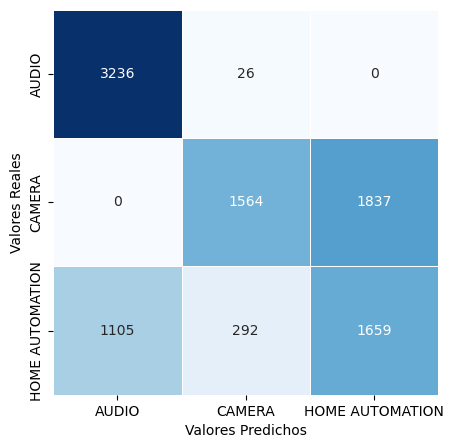

In [10]:
y_pred = clf.predict(X_test_scaled)
cm = metrics.confusion_matrix(y_test, y_pred)

class_names = ['AUDIO', 'CAMERA', 'HOME AUTOMATION']

sns.heatmap(cm, annot = True, fmt = '0.0f', linewidth=0.5, xticklabels=class_names, 
            yticklabels=class_names, square = True, cmap='Blues', cbar = False)

fig = plt.gcf()
fig.set_size_inches(5, 5)

plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()

In [11]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [71]:
MLP.feature_names_in_

array(['L4_tcp', 'L4_udp', 'L7_http', 'L7_https', 'port_class_src',
       'port_class_dst', 'pck_size', 'ethernet_frame_size', 'ttl',
       'total_length', 'protocol', 'DNS_count', 'NTP_count', 'ARP_count',
       'cnt', 'L3_ip_dst_count', 'most_freq_prot', 'sum_et', 'min_et',
       'max_et', 'med_et', 'average_et', 'skew_et', 'kurt_et', 'var',
       'q3', 'q1', 'iqr', 'sum_e', 'min_e', 'max_e', 'med', 'average',
       'skew_e', 'kurt_e', 'var_e', 'q3_e', 'q1_e', 'iqr_e',
       'inter_arrival_time', 'time_since_previously_displayed_frame'],
      dtype=object)

In [12]:
clf2 = MLPClassifier(hidden_layer_sizes=(100,75),
                    activation='identity', 
                    solver='adam',
                    learning_rate='adaptive',
                    max_iter = 200,
                    learning_rate_init=0.001)


start = time.time()
clf2.fit(X_train_scaled, y_train)
stop = time.time()

In [13]:
print(f'MLP execution time: {stop-start: }s')
print(f'Train accuracy : {clf2.score(X_train_scaled, y_train): .3f}')
print(f'Test accuracy : {clf2.score(X_test_scaled, y_test): .3f}')

MLP execution time:  13.29141902923584s
Train accuracy :  0.984
Test accuracy :  0.709


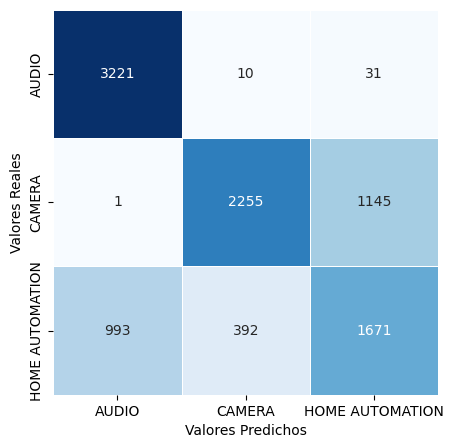

In [10]:
y_pred = clf2.predict(X_test_scaled)
cm = metrics.confusion_matrix(y_test, y_pred)

class_names = ['AUDIO', 'CAMERA', 'HOME AUTOMATION']

sns.heatmap(cm, annot = True, fmt = '0.0f', linewidth=0.5, xticklabels=class_names, 
            yticklabels=class_names, square = True, cmap='Blues', cbar = False)

fig = plt.gcf()
fig.set_size_inches(5, 5)

plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()

In [11]:
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

          AUDIO       0.76      0.99      0.86      3262
         CAMERA       0.85      0.66      0.74      3401
HOME AUTOMATION       0.59      0.55      0.57      3056

       accuracy                           0.74      9719
      macro avg       0.73      0.73      0.72      9719
   weighted avg       0.74      0.74      0.73      9719

